In [47]:
#手写数字识别

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import joblib#保存模型
from collections import Counter

0
Counter({1: 4684, 7: 4401, 3: 4351, 9: 4188, 2: 4177, 6: 4137, 0: 4132, 4: 4072, 8: 4063, 5: 3795})


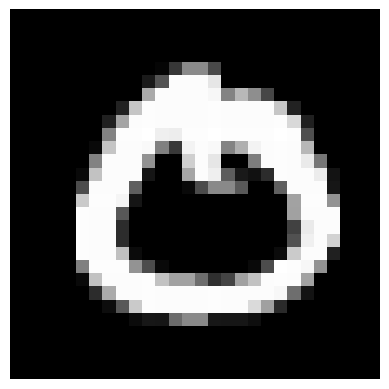

In [65]:
#接受用户传入的索引 展示图片
def show_pic(idx):
    #读取数据集获取源数据
    data = pd.read_csv('./手写数字识别.csv')
    #print(data.shape)
    #判断索引是否越界
    if idx <0 or idx > len(data) -1:
        print('越界')
        return
    #正常获取数据
    x = data.iloc[:,1:]
    y = data.iloc[:,0]
    #查看对应的索引图片
    print(y.iloc[idx])
    #查看下x的形状 想办法吧784变成28*28
    #print(x.iloc[idx].shape)
    #print(x.iloc[idx].values)
    print(Counter(y))#统计数字数量
    #变成28*28
    x = x.iloc[idx].values.reshape(28,28)
    plt.imshow(x,cmap = 'gray')#灰度图
    plt.axis('off')
    plt.show()
show_pic(23)

In [84]:
#模型训练
def train_model():
    #加载数据集
    data = pd.read_csv('./手写数字识别.csv')
    #数据标准化
    x = data.iloc[:,1:]/255
    y = data.iloc[:,0]
    #数据划分
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=21)#stratify=y保持比例
    #创建模型
    estimator = KNeighborsClassifier(n_neighbors=3)
    #模型训练
    estimator.fit(x_train, y_train)
    #模型评估
    my_score = estimator.score(x_test,y_test)
    print('my_score:',my_score)
    #保存模型
    joblib.dump(estimator, './knn.pth')
train_model()

my_score: 0.9657142857142857


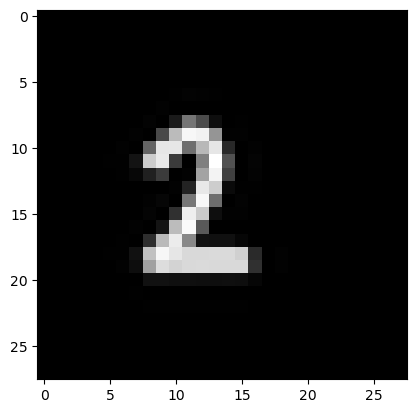

图片数据类型: float32
图片数值范围: 0.0 - 0.9882353
[2]


C:\Users\Lenovo\.conda\envs\DL\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [89]:
# 模型预测
def use_model():
    # 1. 读取图片
    img = plt.imread('./demo.png')  # 灰度图, 28*28像素
    plt.imshow(img, cmap='gray')
    plt.show()
    print("图片数据类型:", img.dtype)
    print("图片数值范围:", img.min(), "-", img.max())#不需要在进行归一化了
    #模型导入 模型加载
    estimator = joblib.load('./knn.pth')
    #图片转化【28，28】→【1，784】
    img = img.reshape(1,-1)#效果等同img.reshape(1,784)
    #模型预测
    y_pred = estimator.predict(img)
    print(y_pred)
use_model()